In [1]:
data = open("../inputs/day-14").read().splitlines()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
lines = [list(map(eval, line.split(' -> '))) for line in data]

In [4]:
max(max([l[0] for l in line]) for line in lines), max(max([l[1] for l in line]) for line in lines)

(528, 166)

In [5]:
grid = np.zeros((530, 200), dtype=int)

0 - air, 1 - rock, 2 - sand.

In [6]:
def build_line(line):
    for i in range(len(line) - 1):
        start, end = line[i], line[i+1]
        x0, x1 = sorted([start[0], end[0]])
        y0, y1 = sorted([start[1], end[1]])        
        grid[x0:x1+1, y0:y1+1] = 1

In [7]:
for l in lines:
    build_line(l)

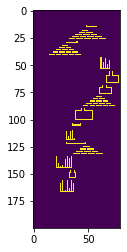

In [8]:
plt.imshow(grid[450:,:].T, interpolation='nearest')
plt.show()

When a sand gets to the last layer at `grid[:,-1]` it means we're done. 

In [9]:
total = 0

In [10]:
def drop_sand():
    global total
    sand = (500,0)
    while True:
        if sand[1] == 167:
            return
        if grid[sand[0], sand[1] + 1] == 0:
            sand = sand[0], sand[1] + 1
        elif grid[sand[0] - 1, sand[1] + 1] == 0:
            sand = sand[0] - 1, sand[1] + 1
        elif grid[sand[0] + 1, sand[1] + 1] == 0:
            sand = sand[0] + 1, sand[1] + 1
        else:
            grid[sand] = 2
            total += 1
            return True

In [11]:
while drop_sand():
    pass

In [12]:
print(total)

1003


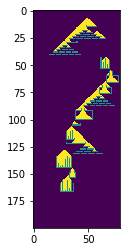

In [13]:
plt.imshow(grid[450:,:].T, interpolation='nearest')
plt.show()

## Adding a floor

Need bigger grid:

In [18]:
grid = np.zeros((750, 200), dtype=int)

In [19]:
for l in lines:
    build_line(l)

Adding a floor:

In [20]:
grid[:, 168] = 1

In [21]:
total = 0

In [23]:
def drop_sand():
    global total
    sand = (500,0)
    while True:
        if grid[sand[0], sand[1] + 1] == 0:
            sand = sand[0], sand[1] + 1
        elif grid[sand[0] - 1, sand[1] + 1] == 0:
            sand = sand[0] - 1, sand[1] + 1
        elif grid[sand[0] + 1, sand[1] + 1] == 0:
            sand = sand[0] + 1, sand[1] + 1
        else:
            grid[sand] = 2
            total += 1
            if sand == (500,0):
                return
            return True

In [24]:
while drop_sand():
    pass

In [25]:
print(total)

25771


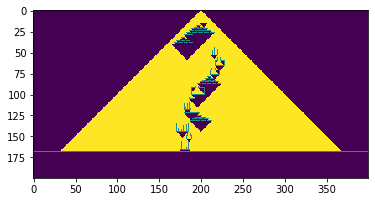

In [26]:
plt.imshow(grid[300:700,:].T, interpolation='nearest')
plt.show()